In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
from sklearn.feature_selection import VarianceThreshold

In [101]:
# Reading csv file

df = pd.read_csv('s3://aws-sagemaker-prediction/owid-covid-data.csv')
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,ABW,North America,Aruba,2020-03-13,2.0,2.0,NaN,0.0,0.0,NaN,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
1,ABW,North America,Aruba,2020-03-19,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
2,ABW,North America,Aruba,2020-03-20,4.0,2.0,0.286,0.0,0.0,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
3,ABW,North America,Aruba,2020-03-21,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
4,ABW,North America,Aruba,2020-03-22,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN


In [102]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'tests_units', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index'],
      dtype='object')

In [103]:
df.shape

(50301, 41)

In [104]:
df.dropna(axis=0, how='any', inplace=True)

In [105]:
df.shape

(4116, 41)

In [106]:
# Grouping for visualization

continent_grouped = df.groupby(['continent']).sum().reset_index()
continent_grouped

,continent,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,Africa,69824896.0,893297.0,884402.134,1385858.0,20678.0,20253.227,1322515.481,16968.918,16776.374,...,7.581258e+06,64849.4,463568.454,8867.39,4953.0,46384.0,49395.210,2379.86,116962.21,1010.207
1,Asia,457357842.0,8351727.0,8119133.713,8470211.0,133714.0,130710.014,1424901.005,20432.100,19614.554,...,1.417173e+07,13093.6,463284.524,11557.71,6331.5,63556.3,103197.209,2565.90,110270.80,1006.741
2,North America,63552898.0,880796.0,864393.426,6104216.0,80922.0,79654.854,1461622.271,19863.306,19509.033,...,7.513040e+06,1196.7,109007.096,5759.13,3397.6,11200.0,44227.469,803.32,41849.33,412.072
3,South America,1566377.0,44175.0,41768.002,27731.0,929.0,873.867,219610.288,6193.460,5855.983,...,1.800710e+06,346.8,40622.112,1687.08,1020.0,4406.4,16238.808,265.20,15147.00,143.208


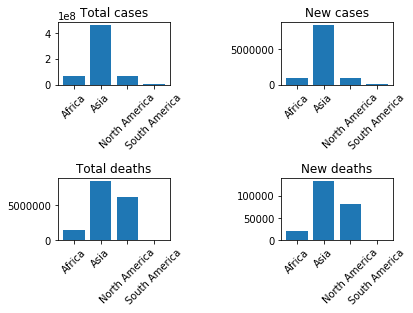

In [107]:
fig, axs = plt.subplots(2, 2)
plt.xticks(rotation=45)
axs[0, 0].bar(continent_grouped['continent'], continent_grouped['total_cases'])
axs[0, 0].set_title('Total cases')
axs[0, 0].tick_params(axis='x', rotation=45)
axs[0, 1].bar(continent_grouped['continent'], continent_grouped['new_cases'])
axs[0, 1].set_title('New cases')
axs[0, 1].tick_params(axis='x', rotation=45)
axs[1, 0].bar(continent_grouped['continent'], continent_grouped['total_deaths'])
axs[1, 0].set_title('Total deaths')
axs[1, 0].tick_params(axis='x', rotation=45)
axs[1, 1].bar(continent_grouped['continent'], continent_grouped['new_deaths'])
axs[1, 1].set_title('New deaths')
axs[1, 1].tick_params(axis='x', rotation=45)
fig.subplots_adjust(wspace=1, hspace=1.5)


In [108]:
# Drop unnecessary columns

df.drop(['iso_code', 'continent', 'location', 'date'], axis=1, inplace=True)

In [109]:
df.shape

(4116, 37)

In [110]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,4.116000e+03,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,...,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000
mean,1.439023e+05,2470.844266,2407.603808,3884.357629,57.396259,56.241973,1075.959438,15.417343,15.003874,29.321982,...,7547.798810,19.311589,261.536002,6.771455,3.814893,30.502114,51.763532,1.461195,69.054747,0.624934
std,6.253604e+05,10589.917541,10411.662554,13318.728280,180.109044,172.423017,2102.450549,32.527425,27.652053,76.308375,...,6214.874841,21.103209,84.466578,2.596605,2.826503,15.917394,29.563205,1.328392,5.152504,0.103833
min,2.000000e+00,0.000000,0.143000,0.000000,0.000000,0.000000,0.016000,0.000000,0.001000,0.000000,...,1095.042000,0.100000,109.861000,1.820000,0.300000,7.700000,7.960000,0.300000,60.850000,0.437000
25%,1.016750e+03,10.000000,13.286000,13.000000,0.000000,0.143000,34.875500,0.425250,0.724750,0.608000,...,2442.804000,2.200000,200.380000,4.610000,1.200000,20.400000,24.651000,0.700000,64.130000,0.562000
50%,5.707000e+03,137.000000,138.500000,91.000000,2.000000,2.143000,181.863000,3.511500,3.636500,3.431000,...,5591.597000,14.800000,260.797000,7.110000,2.800000,29.100000,55.182000,1.300000,69.660000,0.608000
75%,4.586200e+04,841.250000,756.250000,873.000000,16.000000,16.000000,970.087250,16.116000,15.632750,17.422250,...,11188.744000,26.700000,307.846000,8.350000,6.300000,37.800000,79.287000,1.700000,73.600000,0.702000
max,7.175880e+06,97894.000000,93198.571000,109856.000000,2003.000000,1168.000000,11609.294000,1024.993000,212.173000,605.571000,...,24055.588000,71.400000,466.792000,13.060000,9.500000,76.100000,98.999000,6.700000,77.150000,0.800000


In [111]:
label = df['new_cases']

In [112]:
df.drop('new_cases', axis=1, inplace=True)

In [113]:
df.corr()

,total_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
total_cases,1.000000,0.942032,0.831639,0.763683,0.802894,0.280963,0.217766,0.262292,0.206124,0.140299,...,0.025415,-0.026050,0.034828,0.251343,-0.049919,-0.068447,0.060531,-0.087102,0.031755,0.067209
new_cases_smoothed,0.942032,1.000000,0.779280,0.824528,0.855431,0.187491,0.244935,0.286326,0.118662,0.126618,...,0.010107,-0.014486,0.033187,0.269727,-0.073260,-0.085482,0.061089,-0.107712,0.034040,0.060713
total_deaths,0.831639,0.779280,1.000000,0.859702,0.902488,0.352704,0.240862,0.289433,0.635272,0.418034,...,0.168350,-0.097477,-0.083323,0.428116,0.057794,-0.091784,0.163924,-0.082874,0.129608,0.191236
new_deaths,0.763683,0.824528,0.859702,1.000000,0.965133,0.250482,0.276396,0.320565,0.437919,0.514396,...,0.163046,-0.091577,-0.082331,0.458317,0.041706,-0.107366,0.168107,-0.099153,0.130450,0.195939
new_deaths_smoothed,0.802894,0.855431,0.902488,0.965133,1.000000,0.267713,0.279426,0.331198,0.464153,0.450561,...,0.167492,-0.094019,-0.084798,0.469921,0.043143,-0.110085,0.172315,-0.101490,0.133932,0.200981
total_cases_per_million,0.280963,0.187491,0.352704,0.250482,0.267713,1.000000,0.528343,0.644034,0.690147,0.491279,...,0.384665,-0.229660,0.030728,0.198596,0.371072,-0.050872,0.203245,0.287524,0.138930,0.356672
new_cases_per_million,0.217766,0.244935,0.240862,0.276396,0.279426,0.528343,1.000000,0.867553,0.340975,0.470946,...,0.298933,-0.206019,-0.016830,0.205941,0.328267,-0.064063,0.186218,0.185417,0.153162,0.303495
new_cases_smoothed_per_million,0.262292,0.286326,0.289433,0.320565,0.331198,0.644034,0.867553,1.000000,0.416102,0.564344,...,0.342793,-0.234328,-0.022296,0.235231,0.374178,-0.075988,0.210421,0.211415,0.171273,0.347776
total_deaths_per_million,0.206124,0.118662,0.635272,0.437919,0.464153,0.690147,0.340975,0.416102,1.000000,0.661171,...,0.373330,-0.211397,-0.183584,0.396958,0.313719,-0.097008,0.248264,0.102690,0.206487,0.355264
new_deaths_per_million,0.140299,0.126618,0.418034,0.514396,0.450561,0.491279,0.470946,0.564344,0.661171,1.000000,...,0.358045,-0.210954,-0.189167,0.377459,0.313835,-0.098735,0.249652,0.102749,0.205598,0.350510


In [114]:
# Drop highly correlated features

df.drop(['new_cases_smoothed', 'total_deaths', 'new_deaths_smoothed', 'new_tests', 'total_tests', 'new_tests_smoothed'], axis=1, inplace=True)

In [115]:
df.shape

(4116, 30)

In [116]:
# For dropping column with non numeric value

print(np.sum(df.applymap(np.isreal), axis=0))

total_cases                        4116
new_deaths                         4116
total_cases_per_million            4116
new_cases_per_million              4116
new_cases_smoothed_per_million     4116
total_deaths_per_million           4116
new_deaths_per_million             4116
new_deaths_smoothed_per_million    4116
total_tests_per_thousand           4116
new_tests_per_thousand             4116
new_tests_smoothed_per_thousand    4116
tests_per_case                     4116
positive_rate                      4116
tests_units                           0
stringency_index                   4116
population                         4116
population_density                 4116
median_age                         4116
aged_65_older                      4116
aged_70_older                      4116
gdp_per_capita                     4116
extreme_poverty                    4116
cardiovasc_death_rate              4116
diabetes_prevalence                4116
female_smokers                     4116


In [117]:
df.drop('tests_units', axis=1, inplace=True)

In [118]:
# Train test split

X_train, X_test, y_train, y_test = train_test_split(df, label, test_size=0.2, random_state=42)

In [119]:
# Preprocessing step

# Remove low variance features
selector = VarianceThreshold()
X_train  = selector.fit_transform(X_train)
X_test   = selector.transform(X_test)

# Normalising Features
min_max_scaler = preprocessing.StandardScaler()
nX_train = min_max_scaler.fit_transform(X_train)
nX_test = min_max_scaler.transform(X_test)

In [120]:
# Linear Regression with regularization

reg = linear_model.Lasso(alpha=0.1)
reg.fit(nX_train, y_train)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3809859112.7888765, tolerance: 36182417.52314736
  positive)


Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [121]:
y_predict = reg.predict(nX_test)

In [122]:
# Mean absolute error as a metric

print(mean_absolute_error(y_test, y_predict))

1061.228413511765
